In [ ]:
# importing required libraries
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

In [ ]:
from osgeo import gdal
import numpy as np
import sys
from os import listdir
from os.path import isfile, join
import numpy
import cv2
import glob

In [ ]:

! git clone https://github.com/nikhithamalkapuram/ml_datasets.git

Cloning into 'ml_datasets'...
remote: Enumerating objects: 10314, done.
remote: Total 10314 (delta 0), reused 0 (delta 0), pack-reused 10314
Receiving objects: 100% (10314/10314), 360.36 MiB | 32.79 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (10302/10302), done.


In [ ]:
# importing images from github 
def read_img(img_list, img):
    n = cv2.imread(img, 0)
    img_list.append(n)
    return img_list
# creating list of input tiff files
path = glob.glob("ml_datasets/Clipped_NDVI/*.tif") #or jpg
list_ = []
cv_image = [read_img(list_, img) for img in path]
#cv_image_list=read_img(list_,path)
print(len(cv_image))
print(len(cv_image[0]))
print(cv_image[0])
cv_img_list=cv_image[0]

48
48
[array([[255, 255, 255, ...,  60,  54,  48],
       [255, 255, 255, ...,  56,  48,  45],
       [255, 255, 255, ...,  47,  49,  54],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ...,  77,  77,  77],
       [255, 255, 255, ...,  74,  76,  78],
       [255, 255, 255, ...,  74,  74,  75],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ...,  34,  36,  31],
       [255, 255, 255, ...,  29,  31,  32],
       [255, 255, 255, ...,  31,  34,  34],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 104,  98, 100],
       [255, 255, 255, ..., 108, 106, 103],
       [255, 255, 255, ..., 109,

In [ ]:
#creating an empty list to store ndvi and ndvi images 
ndvi_list=[] 
ndvi_img = []

In [7]:
# mapping input gray scale input images to rgb
for k in cv_img_list:
  ndvipos=k/255
  v = numpy.zeros([3,2135,2118],dtype = numpy.float64)
  map1 = [[204,102,0],[153,255,51],[0,204,0],[0,102,0]]
  for i in range(k.shape[0]):
    for j in range(k.shape[1]):
      if ndvipos[i][j] <0.1:
        v[0][i][j] = map1[0][0]
        v[1][i][j] = map1[0][1]
        v[2][i][j] = map1[0][2]
      if ndvipos[i][j] <=0.3 and ndvipos[i][j]>=0.2:
        v[0][i][j] = map1[1][0]
        v[1][i][j] = map1[1][1]
        v[2][i][j] = map1[1][2]
      if ndvipos[i][j] <=0.5 and ndvipos[i][j]>=0.4:
        v[0][i][j] = map1[2][0]
        v[1][i][j] = map1[2][1]
        v[2][i][j] = map1[2][2]
      if ndvipos[i][j] > 0.5:
        v[0][i][j] = map1[3][0]
        v[1][i][j] = map1[3][1]
        v[2][i][j] = map1[3][2]
  ndvi_list.append(v)
# the above list contains rgb values for brown, light green, green and dark green
'''NDVI values :  0<0.1 - represents barren land - denoted by brown color
                  0.1-0.3 -represents area filled with small crops, bushes - denoted by light green color
                  0.4-0.5 -represents area filled with medium sized crops - denoted by green color
                  0.5-1.0 -represents area filled with huge vegetation - denoted by dark green color'''



'NDVI values :  0<0.1 - represents barren land - denoted by brown color\n                  0.1-0.3 -represents area filled with small crops, bushes - denoted by light green color\n                  0.4-0.5 -represents area filled with medium sized crops - denoted by green color\n                  0.5-1.0 -represents area filled with huge vegetation - denoted by dark green color'

In [ ]:
from astropy.visualization import make_lupton_rgb

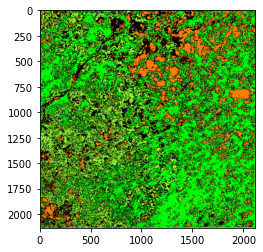

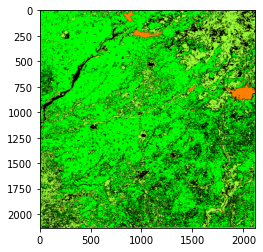

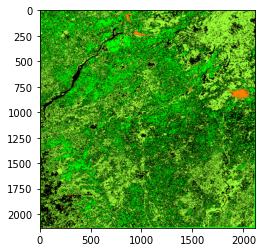

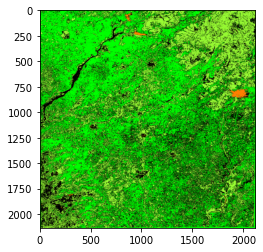

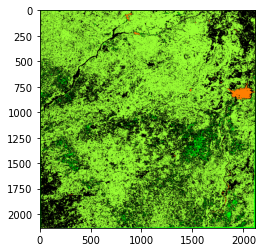

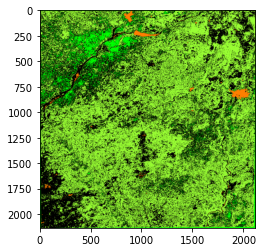

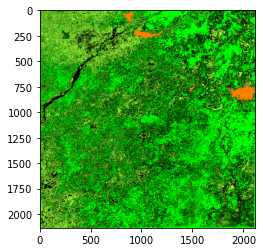

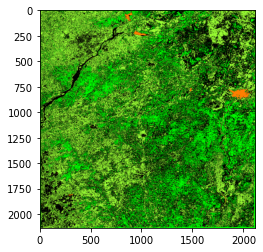

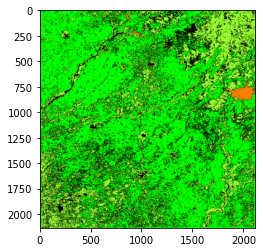

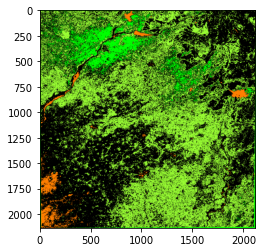

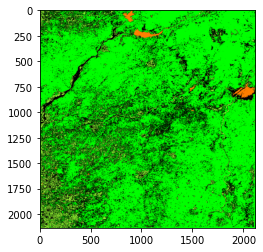

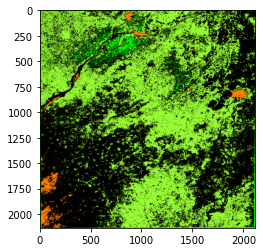

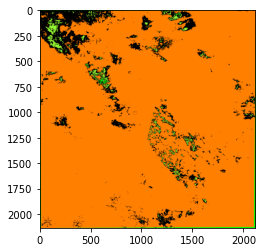

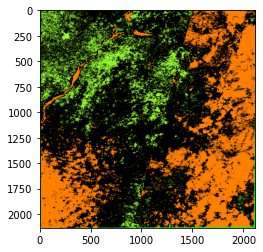

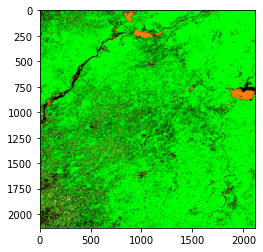

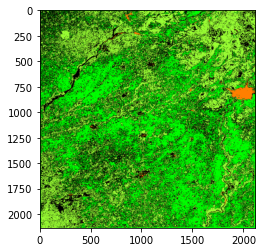

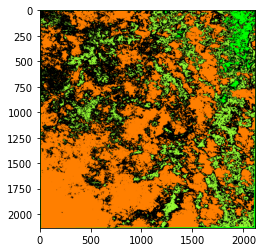

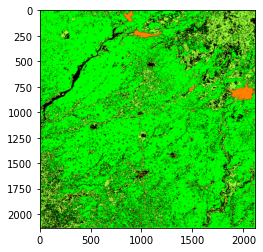

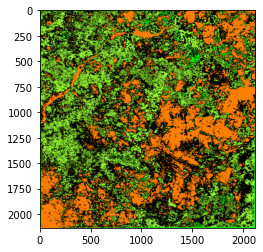

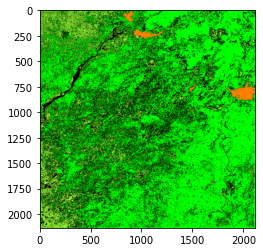

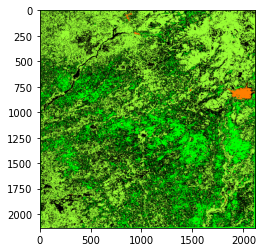

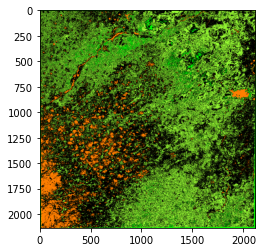

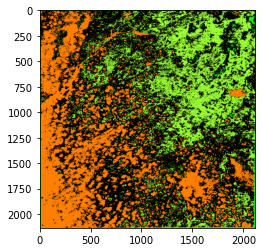

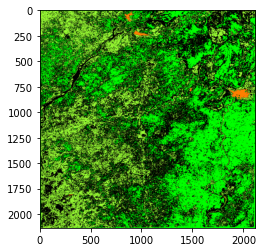

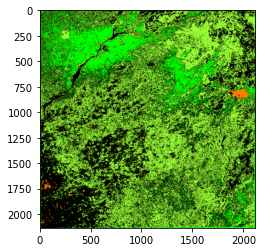

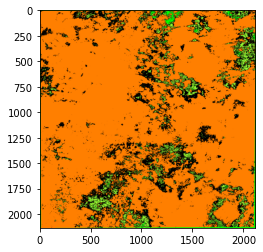

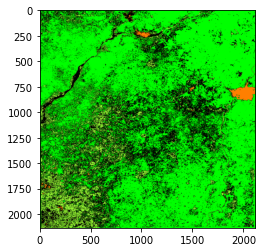

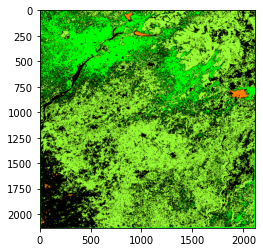

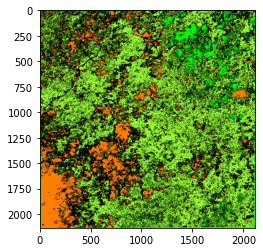

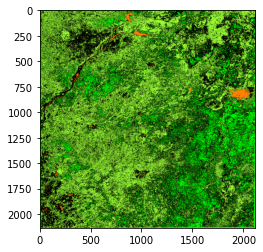

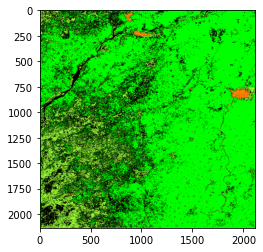

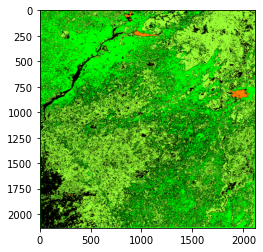

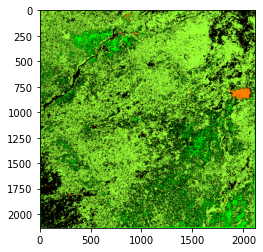

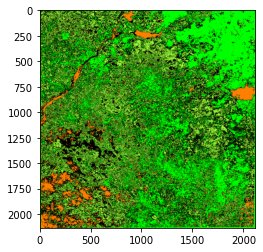

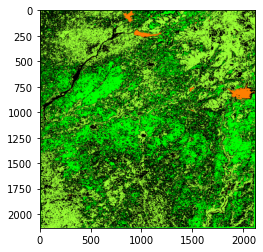

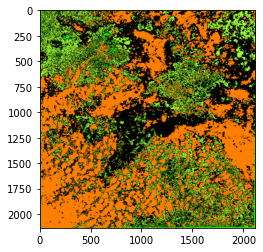

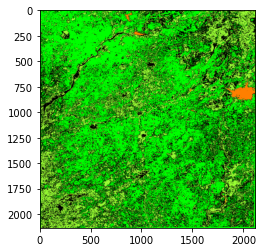

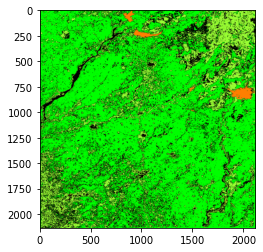

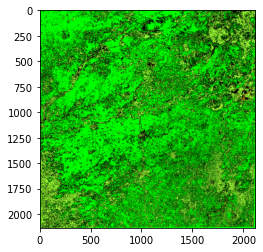

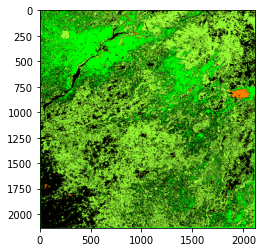

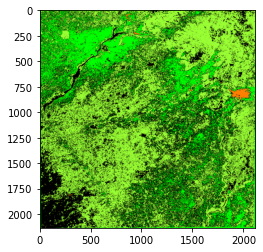

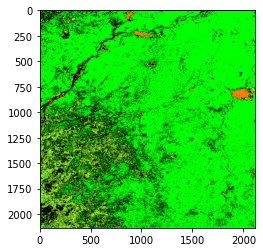

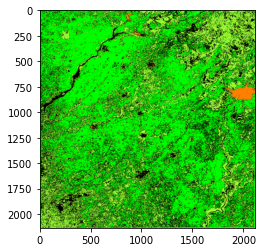

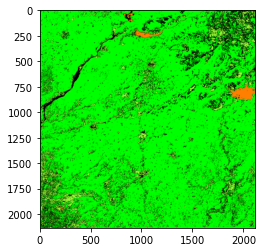

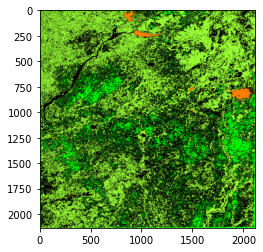

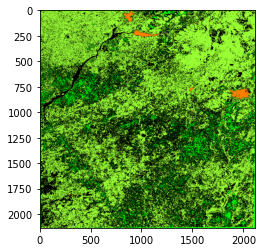

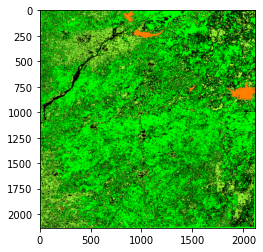

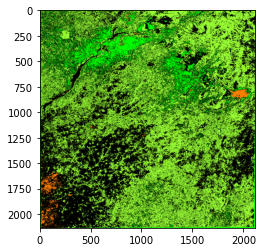

In [ ]:
# combining each of R,G,B bands to form a single RGB image which represent NDVI values
ndvi_img = []
for i in ndvi_list:
  v=make_lupton_rgb(i[0],i[1],i[2])
  ndvi_img.append(v)
  plt.imshow(v)
  plt.show()



In [ ]:
# Saving the obtained NDVI images
j = 0
for i in ndvi_img:
  img  = Image.fromarray(i,"RGB")
  img.save("fig{}.png".format(j))
  j +=1

In [8]:
len(ndvi_img)

0

In [ ]:
#We are comparing each NDVI image with chronologically next image and find NDVI differences.  
ndvi_diff_list = []

In [ ]:
#Displaying NDVIdiff images
for i in range(len(ndvi_img)-1):
  v=ndvi_img[i]-ndvi_img[i+1]
  ndvi_diff_list.append(v)
  plt.imshow(v)
  plt.show()


In [ ]:
#Saving NDVI Diff images
j = 0
for i in ndvi_diff_list:
  img_diff  = Image.fromarray(i,"RGB")
  img_diff.save("ndvidifffig{}.png".format(j))
  j +=1

In [ ]:
len(ndvi_diff_list)

In [ ]:
# Analyzing the differences in the obtained NDVIdiff images to observe either increase or decrease in crop growth
lp = []
ln = []
width = ndvi_diff_list[0].shape[1]
height = ndvi_diff_list[0].shape[0]
for l in ndvi_diff_list:
  count=ncount=0
  count=np.count_nonzero(l>0)
  ncount=np.count_nonzero(l<=0)
  lp.append(count/(3*width*height))
  ln.append(ncount/(3*width*height))



In [ ]:
# the ratio of increase in density of vegation in consecutive temporal images
print(lp)
lp[-3]=0.5

[0.5017238951804502,
 0.585905207142378,
 0.5496066944866462,
 0.6053014236546489,
 0.3843345651082613,
 0.4384323360453022,
 0.45638882807414827,
 0.5131130586571073,
 0.31577062596428224,
 0.30896025959417034,
 0.6138159296288679,
 0.40646928781884434,
 0.5149557821549648,
 0.5386844407881886,
 0.6078028629368434,
 0.5218562280560144,
 0.4872680470507062,
 0.46666659295182955,
 0.20859470771698516,
 0.4142169383426988,
 0.601345222062261,
 0.5763997526130067,
 0.7013227390369451,
 0.7289470793812967,
 0.2855442992999302,
 0.5683105075340249,
 0.5471786751822046,
 0.2517577671480983,
 0.6624443545123432,
 0.58510665431206,
 0.45436410264348776,
 0.4466728439700158,
 0.4096098347387067,
 0.4614792061501763,
 0.3976672202650933,
 0.5582194623387211,
 0.38660520323549163,
 0.5574296815740182,
 0.5357115951227315,
 0.5647504494762192,
 0.5708378207240419,
 0.6272844412304776,
 0.5383511760096537,
 0.19156997122909908,
 0.3149324882664408,
 0.5394563088474759,
 0.5155330430443048]

In [ ]:
# the ratio of increase in density of vegation in consecutive temporal images
ln

[0.49827610481954976,
 0.414094792857622,
 0.4503933055133538,
 0.39469857634535105,
 0.6156654348917387,
 0.5615676639546978,
 0.5436111719258517,
 0.4868869413428927,
 0.6842293740357178,
 0.6910397404058297,
 0.3861840703711321,
 0.5935307121811557,
 0.4850442178450352,
 0.4613155592118115,
 0.3921971370631567,
 0.47814377194398555,
 0.5127319529492937,
 0.5333334070481704,
 0.7914052922830148,
 0.5857830616573012,
 0.39865477793773896,
 0.4236002473869933,
 0.29867726096305486,
 0.2710529206187034,
 0.7144557007000698,
 0.4316894924659751,
 0.45282132481779536,
 0.7482422328519017,
 0.3375556454876568,
 0.41489334568794,
 0.5456358973565122,
 0.5533271560299843,
 0.5903901652612933,
 0.5385207938498238,
 0.6023327797349067,
 0.44178053766127884,
 0.6133947967645084,
 0.4425703184259818,
 0.46428840487726847,
 0.4352495505237808,
 0.4291621792759581,
 0.37271555876952245,
 0.4616488239903463,
 0.8084300287709009,
 0.6850675117335592,
 0.4605436911525241,
 0.4844669569556952]

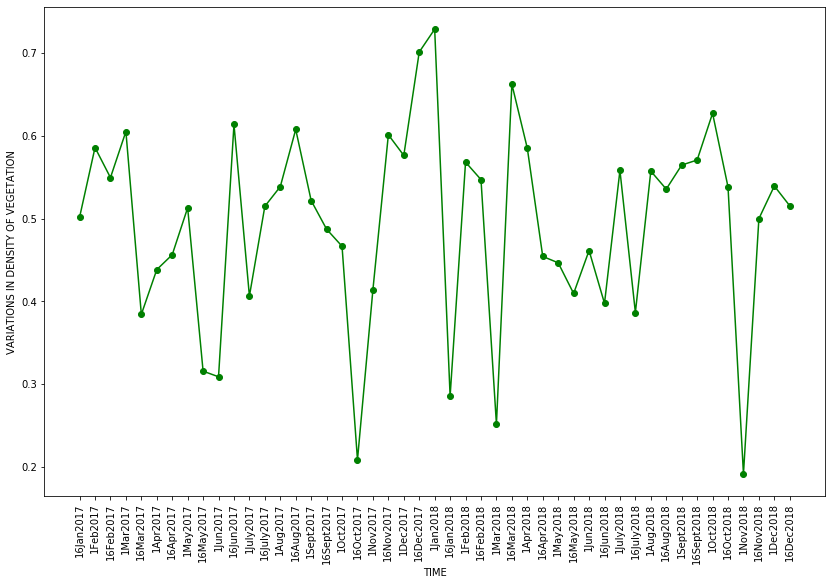

<Figure size 432x216 with 0 Axes>

In [ ]:
#plot the ndvi  differences analysis
from matplotlib.pyplot import figure
max_limit = max(max(lp),max(ln))
min_limit = min(min(lp),min(ln))
mon_yr = ["16Jan2017","1Feb2017","16Feb2017","1Mar2017","16Mar2017","1Apr2017","16Apr2017","1May2017","16May2017","1Jun2017","16Jun2017","1July2017","16July2017","1Aug2017","16Aug2017","1Sept2017","16Sept2017","1Oct2017","16Oct2017","1Nov2017","16Nov2017","1Dec2017","16Dec2017","1Jan2018","16Jan2018","1Feb2018","16Feb2018","1Mar2018","16Mar2018","1Apr2018","16Apr2018","1May2018","16May2018","1Jun2018","16Jun2018","1July2018","16July2018","1Aug2018","16Aug2018","1Sept2018","16Sept2018","1Oct2018","16Oct2018","1Nov2018","16Nov2018","1Dec2018","16Dec2018"]
figure(figsize = (14,9))
plt.xlabel("TIME")
plt.ylabel("VARIATIONS IN DENSITY OF VEGETATION",rotation=90)
plt.plot(mon_yr,lp, 'go-')
#figure(figsize = (3,6))
plt.savefig('plot.png')
plt.xticks(rotation = 90)
fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(6)
plt.savefig("fig.png")
#plt.xlabe("time",rotation=90)

In [ ]:
#deriving conclusions
mon_yr = ["16Jan2017","1Feb2017","16Feb2017","1Mar2017","16Mar2017","1Apr2017","16Apr2017","1May2017","16May2017","1Jun2017","16Jun2017","1July2017","16July2017","1Aug2017","16Aug2017","1Sept2017","16Sept2017","1Oct2017","16Oct2017","1Nov2017","16Nov2017","1Dec2017","16Dec2017","1Jan2018","16Jan2018","1Feb2018","16Feb2018","1Mar2018","16Mar2018","1Apr2018","16Apr2018","1May2018","16May2018","1Jun2018","16Jun2018","1July2018","16July2018","1Aug2018","16Aug2018","1Sept2018","16Sept2018","1Oct2018","16Oct2018","1Nov2018","16Nov2018","1Dec2018","16Dec2018"]
def conclude(lp):
  harvest_count=0
  for i in range(len(lp)-1):
    diff=lp[i]-lp[i+1]
    if diff<=0.05:
      print(mon_yr[i]," - There is slight increase in growth of crop")
    if diff<=0.1:
      print(mon_yr[i]," - There is more increase in growth of crop")
    if diff>0.1:
      print(mon_yr[i]," - There is extreme increase in growth of crop")
    if diff<0.2:
      print(mon_yr[i]," - There is decrease in growth of crop")
      if lp[i]<0.35:
        print("Harvest has occured during:",mon_yr[i],"\n")
        print("Plant sowing occured",mon_yr[i+1])
        harvest_count+=1
  print("Number of harvests occuring",harvest_count)

In [ ]:
conclude(lp)

16Jan2017  - There is slight increase in growth of crop
16Jan2017  - There is more increase in growth of crop
16Jan2017  - There is decrease in growth of crop
1Feb2017  - There is slight increase in growth of crop
1Feb2017  - There is more increase in growth of crop
1Feb2017  - There is decrease in growth of crop
16Feb2017  - There is slight increase in growth of crop
16Feb2017  - There is more increase in growth of crop
16Feb2017  - There is decrease in growth of crop
1Mar2017  - There is extreme increase in growth of crop
16Mar2017  - There is slight increase in growth of crop
16Mar2017  - There is more increase in growth of crop
16Mar2017  - There is decrease in growth of crop
1Apr2017  - There is slight increase in growth of crop
1Apr2017  - There is more increase in growth of crop
1Apr2017  - There is decrease in growth of crop
16Apr2017  - There is slight increase in growth of crop
16Apr2017  - There is more increase in growth of crop
16Apr2017  - There is decrease in growth of c